In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Carregar dados
file_path = 'adult_data/adult.data'

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(file_path, header=None, names=columns, skipinitialspace=True)

# Backup da coluna original
df_original = df.copy()

# 2. Introduzir 10% de valores ausentes MCAR na coluna education
np.random.seed(42)
missing_mask = np.random.rand(len(df)) < 0.10
df.loc[missing_mask, 'education'] = np.nan

# Encode rótulos categóricos para Random Forest
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = df_encoded[col].astype(str)
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Separar dados com e sem missing
df_missing = df_encoded[df['education'].isna()]
df_not_missing = df_encoded[df['education'].notna()]

# 3. Treinar RandomForest para prever education
X_train = df_not_missing.drop(columns=['education', 'education-num'])
y_train = df_not_missing['education']
X_test = df_missing.drop(columns=['education', 'education-num'])

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Restaurar valores imputados no dataset original
df_imputed_rf = df.copy()
df_imputed_rf.loc[df['education'].isna(), 'education'] = label_encoders['education'].inverse_transform(rf_preds)

# 4. Comparar com valores verdadeiros (antes de apagar)
true_values = df_original.loc[missing_mask, 'education']
rf_values = df_imputed_rf.loc[missing_mask, 'education']
accuracy_rf = (true_values == rf_values).mean()

# 5. Imputar por moda
mode_value = df_original['education'].mode()[0]
df_imputed_mode = df.copy()
df_imputed_mode.loc[missing_mask, 'education'] = mode_value
mode_values = df_imputed_mode.loc[missing_mask, 'education']
accuracy_mode = (true_values == mode_values).mean()

# 6. Comparar com acerto aleatório
n_categories = df_original['education'].nunique()
random_accuracy = 1 / n_categories

# 7. Resultados
print(f"Accuracy RF Imputation: {accuracy_rf:.4f}")
print(f"Accuracy Mode Imputation: {accuracy_mode:.4f}")
print(f"Random Chance Baseline: {random_accuracy:.4f}")


# 8. Armazena resultados
results_rf = []

# Número de categorias (para baseline)
num_classes = df_original['education'].nunique()

# Armazena resultado da Random Forest
results_rf.append({
    'variavel': 'education',
    'metodo': 'Random Forest',
    'acuracia': accuracy_rf,
    'num_categorias': num_classes
})

# Armazena resultado da imputação pela moda
results_rf.append({
    'variavel': 'education',
    'metodo': 'Moda',
    'acuracia': accuracy_mode,
    'num_categorias': num_classes
})

# Armazena baseline aleatório
results_rf.append({
    'variavel': 'education',
    'metodo': 'Aleatória',
    'acuracia': random_accuracy,
    'num_categorias': num_classes
})


Accuracy RF Imputation: 0.3782
Accuracy Mode Imputation: 0.3220
Random Chance Baseline: 0.0625


In [17]:
# 1. Carregar dados
file_path = 'adult_data/adult.data'

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(file_path, header=None, names=columns, skipinitialspace=True)

# Backup da coluna original
df_original = df.copy()

# 2. Introduzir 10% de valores ausentes MCAR na coluna occupation
np.random.seed(42)
missing_mask = np.random.rand(len(df)) < 0.10
df.loc[missing_mask, 'occupation'] = np.nan

# 3. Encode rótulos categóricos
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = df_encoded[col].astype(str)
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# 4. Separar dados com e sem missing na coluna occupation
df_missing = df_encoded[df['occupation'].isna()]
df_not_missing = df_encoded[df['occupation'].notna()]

# 5. Treinar RandomForest para prever occupation
X_train = df_not_missing.drop(columns=['occupation'])
y_train = df_not_missing['occupation']
X_test = df_missing.drop(columns=['occupation'])

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# 6. Restaurar valores imputados no dataset original
df_imputed_rf = df.copy()
df_imputed_rf.loc[df['occupation'].isna(), 'occupation'] = label_encoders['occupation'].inverse_transform(rf_preds)

# 7. Comparar com valores verdadeiros (antes de apagar)
true_values = df_original.loc[missing_mask, 'occupation']
rf_values = df_imputed_rf.loc[missing_mask, 'occupation']
accuracy_rf = (true_values == rf_values).mean()

# 8. Imputar por moda
mode_value = df_original['occupation'].mode()[0]
df_imputed_mode = df.copy()
df_imputed_mode.loc[missing_mask, 'occupation'] = mode_value
mode_values = df_imputed_mode.loc[missing_mask, 'occupation']
accuracy_mode = (true_values == mode_values).mean()

# 9. Comparar com acerto aleatório
n_categories = df_original['occupation'].nunique()
random_accuracy = 1 / n_categories

# 10. Resultados
print(f"Accuracy RF Imputation: {accuracy_rf:.4f}")
print(f"Accuracy Mode Imputation: {accuracy_mode:.4f}")
print(f"Random Chance Baseline: {random_accuracy:.4f}")

# 11. Armazena resultados
num_classes = n_categories

results_rf.append({
    'variavel': 'occupation',
    'metodo': 'Random Forest',
    'acuracia': accuracy_rf,
    'num_categorias': num_classes
})

results_rf.append({
    'variavel': 'occupation',
    'metodo': 'Moda',
    'acuracia': accuracy_mode,
    'num_categorias': num_classes
})

results_rf.append({
    'variavel': 'occupation',
    'metodo': 'Aleatória',
    'acuracia': random_accuracy,
    'num_categorias': num_classes
})

Accuracy RF Imputation: 0.3399
Accuracy Mode Imputation: 0.1227
Random Chance Baseline: 0.0667


In [7]:
# 1. Carregar dados
file_path = 'adult_data/adult.data'

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(file_path, header=None, names=columns, skipinitialspace=True)

# Backup da coluna original
df_original = df.copy()

# 2. Introduzir 10% de valores ausentes MCAR na coluna workclass
np.random.seed(42)
missing_mask = np.random.rand(len(df)) < 0.10
df.loc[missing_mask, 'workclass'] = np.nan

# 3. Encode rótulos categóricos
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = df_encoded[col].astype(str)
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# 4. Separar dados com e sem missing na coluna workclass
df_missing = df_encoded[df['workclass'].isna()]
df_not_missing = df_encoded[df['workclass'].notna()]

# 5. Treinar RandomForest para prever workclass
X_train = df_not_missing.drop(columns=['workclass'])
y_train = df_not_missing['workclass']
X_test = df_missing.drop(columns=['workclass'])

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# 6. Restaurar valores imputados no dataset original
df_imputed_rf = df.copy()
df_imputed_rf.loc[df['workclass'].isna(), 'workclass'] = label_encoders['workclass'].inverse_transform(rf_preds)

# 7. Comparar com valores verdadeiros (antes de apagar)
true_values = df_original.loc[missing_mask, 'workclass']
rf_values = df_imputed_rf.loc[missing_mask, 'workclass']
accuracy_rf = (true_values == rf_values).mean()

# 8. Imputar por moda
mode_value = df_original['workclass'].mode()[0]
df_imputed_mode = df.copy()
df_imputed_mode.loc[missing_mask, 'workclass'] = mode_value
mode_values = df_imputed_mode.loc[missing_mask, 'workclass']
accuracy_mode = (true_values == mode_values).mean()

# 9. Comparar com acerto aleatório
n_categories = df_original['workclass'].nunique()
random_accuracy = 1 / n_categories

# 10. Resultados
print(f"Accuracy RF Imputation: {accuracy_rf:.4f}")
print(f"Accuracy Mode Imputation: {accuracy_mode:.4f}")
print(f"Random Chance Baseline: {random_accuracy:.4f}")

# 11. Armazena resultados

# Número de categorias (para baseline)
num_classes = n_categories

# Armazena resultado da Random Forest
results_rf.append({
    'variavel': 'workclass',
    'metodo': 'Random Forest',
    'acuracia': accuracy_rf,
    'num_categorias': num_classes
})

# Armazena resultado da imputação pela moda
results_rf.append({
    'variavel': 'workclass',
    'metodo': 'Moda',
    'acuracia': accuracy_mode,
    'num_categorias': num_classes
})

# Armazena baseline aleatório
results_rf.append({
    'variavel': 'workclass',
    'metodo': 'Aleatória',
    'acuracia': random_accuracy,
    'num_categorias': num_classes
})

Accuracy RF Imputation: 0.7464
Accuracy Mode Imputation: 0.6892
Random Chance Baseline: 0.1111


In [9]:
# 1. Carregar dados
file_path = 'adult_data/adult.data'

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(file_path, header=None, names=columns, skipinitialspace=True)

# Backup da coluna original
df_original = df.copy()

# 2. Introduzir 10% de valores ausentes MCAR na coluna marital-status
np.random.seed(42)
missing_mask = np.random.rand(len(df)) < 0.10
df.loc[missing_mask, 'marital-status'] = np.nan

# 3. Encode rótulos categóricos
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = df_encoded[col].astype(str)
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# 4. Separar dados com e sem missing na coluna marital-status
df_missing = df_encoded[df['marital-status'].isna()]
df_not_missing = df_encoded[df['marital-status'].notna()]

# 5. Treinar RandomForest para prever marital-status
X_train = df_not_missing.drop(columns=['marital-status'])
y_train = df_not_missing['marital-status']
X_test = df_missing.drop(columns=['marital-status'])

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# 6. Restaurar valores imputados no dataset original
df_imputed_rf = df.copy()
df_imputed_rf.loc[df['marital-status'].isna(), 'marital-status'] = label_encoders['marital-status'].inverse_transform(rf_preds)

# 7. Comparar com valores verdadeiros (antes de apagar)
true_values = df_original.loc[missing_mask, 'marital-status']
rf_values = df_imputed_rf.loc[missing_mask, 'marital-status']
accuracy_rf = (true_values == rf_values).mean()

# 8. Imputar por moda
mode_value = df_original['marital-status'].mode()[0]
df_imputed_mode = df.copy()
df_imputed_mode.loc[missing_mask, 'marital-status'] = mode_value
mode_values = df_imputed_mode.loc[missing_mask, 'marital-status']
accuracy_mode = (true_values == mode_values).mean()

# 9. Comparar com acerto aleatório
n_categories = df_original['marital-status'].nunique()
random_accuracy = 1 / n_categories

# 10. Resultados
print(f"Accuracy RF Imputation: {accuracy_rf:.4f}")
print(f"Accuracy Mode Imputation: {accuracy_mode:.4f}")
print(f"Random Chance Baseline: {random_accuracy:.4f}")

# 11. Armazena resultados

# Número de categorias (para baseline)
num_classes = n_categories

# Armazena resultado da Random Forest
results_rf.append({
    'variavel': 'marital-status',
    'metodo': 'Random Forest',
    'acuracia': accuracy_rf,
    'num_categorias': num_classes
})

# Armazena resultado da imputação pela moda
results_rf.append({
    'variavel': 'marital-status',
    'metodo': 'Moda',
    'acuracia': accuracy_mode,
    'num_categorias': num_classes
})

# Armazena baseline aleatório
results_rf.append({
    'variavel': 'marital-status',
    'metodo': 'Aleatória',
    'acuracia': random_accuracy,
    'num_categorias': num_classes
})

Accuracy RF Imputation: 0.8351
Accuracy Mode Imputation: 0.4496
Random Chance Baseline: 0.1429


In [11]:
# 1. Carregar dados
file_path = 'adult_data/adult.data'

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(file_path, header=None, names=columns, skipinitialspace=True)

# Backup da coluna original
df_original = df.copy()

# 2. Introduzir 10% de valores ausentes MCAR na coluna relationship
np.random.seed(42)
missing_mask = np.random.rand(len(df)) < 0.10
df.loc[missing_mask, 'relationship'] = np.nan

# 3. Encode rótulos categóricos
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = df_encoded[col].astype(str)
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# 4. Separar dados com e sem missing na coluna relationship
df_missing = df_encoded[df['relationship'].isna()]
df_not_missing = df_encoded[df['relationship'].notna()]

# 5. Treinar RandomForest para prever relationship
X_train = df_not_missing.drop(columns=['relationship'])
y_train = df_not_missing['relationship']
X_test = df_missing.drop(columns=['relationship'])

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# 6. Restaurar valores imputados no dataset original
df_imputed_rf = df.copy()
df_imputed_rf.loc[df['relationship'].isna(), 'relationship'] = label_encoders['relationship'].inverse_transform(rf_preds)

# 7. Comparar com valores verdadeiros (antes de apagar)
true_values = df_original.loc[missing_mask, 'relationship']
rf_values = df_imputed_rf.loc[missing_mask, 'relationship']
accuracy_rf = (true_values == rf_values).mean()

# 8. Imputar por moda
mode_value = df_original['relationship'].mode()[0]
df_imputed_mode = df.copy()
df_imputed_mode.loc[missing_mask, 'relationship'] = mode_value
mode_values = df_imputed_mode.loc[missing_mask, 'relationship']
accuracy_mode = (true_values == mode_values).mean()

# 9. Comparar com acerto aleatório
n_categories = df_original['relationship'].nunique()
random_accuracy = 1 / n_categories

# 10. Resultados
print(f"Accuracy RF Imputation: {accuracy_rf:.4f}")
print(f"Accuracy Mode Imputation: {accuracy_mode:.4f}")
print(f"Random Chance Baseline: {random_accuracy:.4f}")

# 11. Armazena resultados

# Número de categorias (para baseline)
num_classes = n_categories

# Armazena resultado da Random Forest
results_rf.append({
    'variavel': 'relationship',
    'metodo': 'Random Forest',
    'acuracia': accuracy_rf,
    'num_categorias': num_classes
})

# Armazena resultado da imputação pela moda
results_rf.append({
    'variavel': 'relationship',
    'metodo': 'Moda',
    'acuracia': accuracy_mode,
    'num_categorias': num_classes
})

# Armazena baseline aleatório
results_rf.append({
    'variavel': 'relationship',
    'metodo': 'Aleatória',
    'acuracia': random_accuracy,
    'num_categorias': num_classes
})


Accuracy RF Imputation: 0.7822
Accuracy Mode Imputation: 0.3995
Random Chance Baseline: 0.1667


In [13]:
# 1. Carregar dados
file_path = 'adult_data/adult.data'

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(file_path, header=None, names=columns, skipinitialspace=True)

# Backup da coluna original
df_original = df.copy()

# 2. Introduzir 10% de valores ausentes MCAR na coluna race
np.random.seed(42)
missing_mask = np.random.rand(len(df)) < 0.10
df.loc[missing_mask, 'race'] = np.nan

# 3. Encode rótulos categóricos
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = df_encoded[col].astype(str)
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# 4. Separar dados com e sem missing na coluna race
df_missing = df_encoded[df['race'].isna()]
df_not_missing = df_encoded[df['race'].notna()]

# 5. Treinar RandomForest para prever race
X_train = df_not_missing.drop(columns=['race'])
y_train = df_not_missing['race']
X_test = df_missing.drop(columns=['race'])

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# 6. Restaurar valores imputados no dataset original
df_imputed_rf = df.copy()
df_imputed_rf.loc[df['race'].isna(), 'race'] = label_encoders['race'].inverse_transform(rf_preds)

# 7. Comparar com valores verdadeiros (antes de apagar)
true_values = df_original.loc[missing_mask, 'race']
rf_values = df_imputed_rf.loc[missing_mask, 'race']
accuracy_rf = (true_values == rf_values).mean()

# 8. Imputar por moda
mode_value = df_original['race'].mode()[0]
df_imputed_mode = df.copy()
df_imputed_mode.loc[missing_mask, 'race'] = mode_value
mode_values = df_imputed_mode.loc[missing_mask, 'race']
accuracy_mode = (true_values == mode_values).mean()

# 9. Comparar com acerto aleatório
n_categories = df_original['race'].nunique()
random_accuracy = 1 / n_categories

# 10. Resultados
print(f"Accuracy RF Imputation: {accuracy_rf:.4f}")
print(f"Accuracy Mode Imputation: {accuracy_mode:.4f}")
print(f"Random Chance Baseline: {random_accuracy:.4f}")

# 11. Armazena resultados

# Número de categorias (para baseline)
num_classes = n_categories

# Armazena resultado da Random Forest
results_rf.append({
    'variavel': 'race',
    'metodo': 'Random Forest',
    'acuracia': accuracy_rf,
    'num_categorias': num_classes
})

# Armazena resultado da imputação pela moda
results_rf.append({
    'variavel': 'race',
    'metodo': 'Moda',
    'acuracia': accuracy_mode,
    'num_categorias': num_classes
})

# Armazena baseline aleatório
results_rf.append({
    'variavel': 'race',
    'metodo': 'Aleatória',
    'acuracia': random_accuracy,
    'num_categorias': num_classes
})

Accuracy RF Imputation: 0.8673
Accuracy Mode Imputation: 0.8542
Random Chance Baseline: 0.2000


In [15]:
# 1. Carregar dados
file_path = 'adult_data/adult.data'

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv(file_path, header=None, names=columns, skipinitialspace=True)

# Backup da coluna original
df_original = df.copy()

# 2. Introduzir 10% de valores ausentes MCAR na coluna sex
np.random.seed(42)
missing_mask = np.random.rand(len(df)) < 0.10
df.loc[missing_mask, 'sex'] = np.nan

# 3. Encode rótulos categóricos
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = df_encoded[col].astype(str)
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# 4. Separar dados com e sem missing na coluna sex
df_missing = df_encoded[df['sex'].isna()]
df_not_missing = df_encoded[df['sex'].notna()]

# 5. Treinar RandomForest para prever sex
X_train = df_not_missing.drop(columns=['sex'])
y_train = df_not_missing['sex']
X_test = df_missing.drop(columns=['sex'])

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# 6. Restaurar valores imputados no dataset original
df_imputed_rf = df.copy()
df_imputed_rf.loc[df['sex'].isna(), 'sex'] = label_encoders['sex'].inverse_transform(rf_preds)

# 7. Comparar com valores verdadeiros (antes de apagar)
true_values = df_original.loc[missing_mask, 'sex']
rf_values = df_imputed_rf.loc[missing_mask, 'sex']
accuracy_rf = (true_values == rf_values).mean()

# 8. Imputar por moda
mode_value = df_original['sex'].mode()[0]
df_imputed_mode = df.copy()
df_imputed_mode.loc[missing_mask, 'sex'] = mode_value
mode_values = df_imputed_mode.loc[missing_mask, 'sex']
accuracy_mode = (true_values == mode_values).mean()

# 9. Comparar com acerto aleatório
n_categories = df_original['sex'].nunique()
random_accuracy = 1 / n_categories

# 10. Resultados
print(f"Accuracy RF Imputation: {accuracy_rf:.4f}")
print(f"Accuracy Mode Imputation: {accuracy_mode:.4f}")
print(f"Random Chance Baseline: {random_accuracy:.4f}")

# 11. Armazena resultados
num_classes = n_categories

results_rf.append({
    'variavel': 'sex',
    'metodo': 'Random Forest',
    'acuracia': accuracy_rf,
    'num_categorias': num_classes
})

results_rf.append({
    'variavel': 'sex',
    'metodo': 'Moda',
    'acuracia': accuracy_mode,
    'num_categorias': num_classes
})

results_rf.append({
    'variavel': 'sex',
    'metodo': 'Aleatória',
    'acuracia': random_accuracy,
    'num_categorias': num_classes
})


Accuracy RF Imputation: 0.8360
Accuracy Mode Imputation: 0.6634
Random Chance Baseline: 0.5000


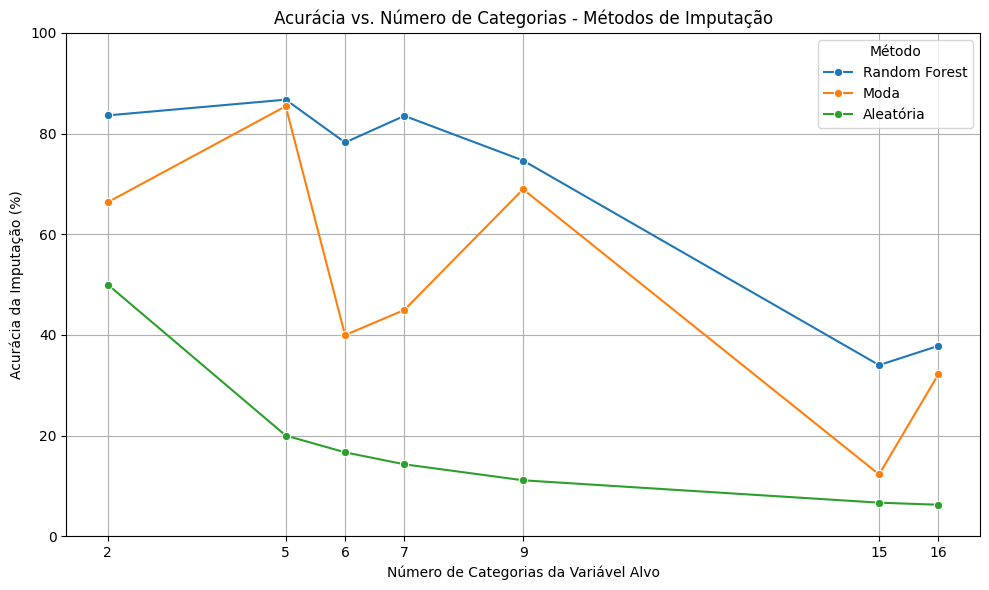

In [18]:
# Converte lista de resultados para DataFrame
df_results = pd.DataFrame(results_rf)

# Converte acurácia para porcentagem
df_results['acuracia'] = df_results['acuracia'] * 100

# Plota gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x='num_categorias', y='acuracia', hue='metodo', marker='o')

plt.title('Acurácia vs. Número de Categorias - Métodos de Imputação')
plt.xlabel('Número de Categorias da Variável Alvo')
plt.ylabel('Acurácia da Imputação (%)')
plt.ylim(0, 100)
plt.xticks(df_results['num_categorias'].unique())
plt.grid(True)
plt.tight_layout()
plt.legend(title='Método')
plt.show()
